In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]

X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

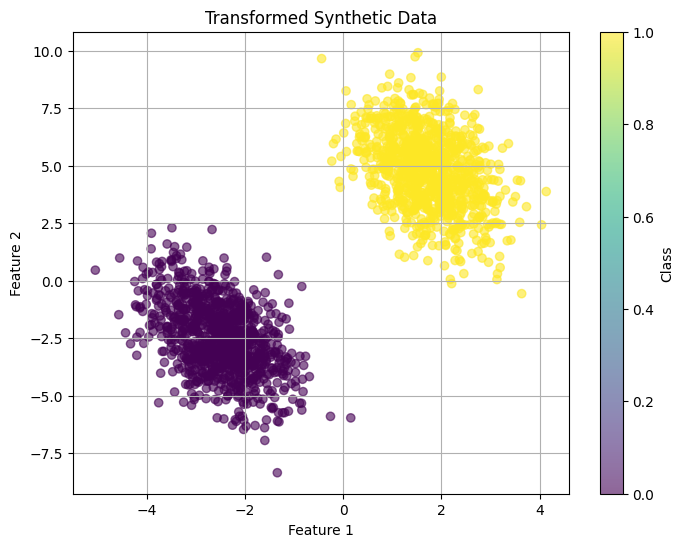

In [8]:
# Optional: Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title("Transformed Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.grid(True)
plt.show()

In [9]:
# Add a column of ones to X for the bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Shape: (2000, 3)

# Convert labels to {0, 1} if not already
y = (y == 1).astype(int)  # Ensure binary labels

In [ ]:
# Implement Batch Gradient Descent
def sigmoid(z):
    """Sigmoid function to avoid overflow."""
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))


def logistic_loss(X, y, w):
    """Compute the logistic loss (cross-entropy)."""
    z = X.dot(w)
    return -np.mean(y * np.log(sigmoid(z)) + (1 - y) * np.log(1 - sigmoid(z)))


def gradient(X, y, w):
    """Compute the gradient of the logistic loss."""
    z = X.dot(w)
    predictions = sigmoid(z)
    return X.T.dot(predictions - y) / len(y)

In [12]:
# Initialize weights
# Method: Initialize with small random values (or zeros)
# Reason: Starting from zero is common and safe for convex problems like logistic regression.
# Small random values can also be used to break symmetry, though it's less critical here.
w_gd = np.zeros(X.shape[1])  # Initialize weights to zero

# Learning rate and iterations
learning_rate = 0.1
n_iterations = 20
losses_gd = []

In [13]:
# Gradient Descent Loop
for i in range(n_iterations):
    grad = gradient(X, y, w_gd)
    w_gd = w_gd - learning_rate * grad
    current_loss = logistic_loss(X, y, w_gd)
    losses_gd.append(current_loss)
    if i % 5 == 0:
        print(f"Iteration {i}, Loss: {current_loss:.4f}")

print("Final weights (GD):", w_gd)

Iteration 0, Loss: 0.3553
Iteration 5, Loss: 0.1182
Iteration 10, Loss: 0.0753
Iteration 15, Loss: 0.0563
Final weights (GD): [-0.05363315  0.53927699  0.66486896]


In [14]:
# Implement Newton's Method
def hessian(X, w):
    """Compute the Hessian matrix of the logistic loss."""
    z = X.dot(w)
    p = sigmoid(z)
    W = np.diag(p * (1 - p))  # Diagonal matrix of p_i*(1-p_i)
    return (X.T @ W @ X) / len(w)

In [15]:
# Initialize weights (same as GD for comparison)
w_newton = np.zeros(X.shape[1])

n_iterations = 20
losses_newton = []

In [16]:
# Newton's Method Loop
for i in range(n_iterations):
    grad = gradient(X, y, w_newton)
    hess = hessian(X, w_newton)

    # Update: w = w - H^-1 * grad
    # Use np.linalg.solve for numerical stability instead of inverting H directly
    try:
        delta = np.linalg.solve(hess, grad)
        w_newton = w_newton - delta
    except np.linalg.LinAlgError:
        # If Hessian is singular, fall back to gradient step
        print(
            f"Warning: Hessian singular at iteration {i}. Using gradient step.")
        w_newton = w_newton - 0.1 * grad

    current_loss = logistic_loss(X, y, w_newton)
    losses_newton.append(current_loss)
    if i % 5 == 0:
        print(f"Iteration {i}, Loss: {current_loss:.4f}")

print("Final weights (Newton):", w_newton)

Iteration 0, Loss: 0.6917
Iteration 5, Loss: 0.6846
Iteration 10, Loss: 0.6775
Iteration 15, Loss: 0.6706
Final weights (Newton): [-0.00117772  0.01593698  0.00634158]


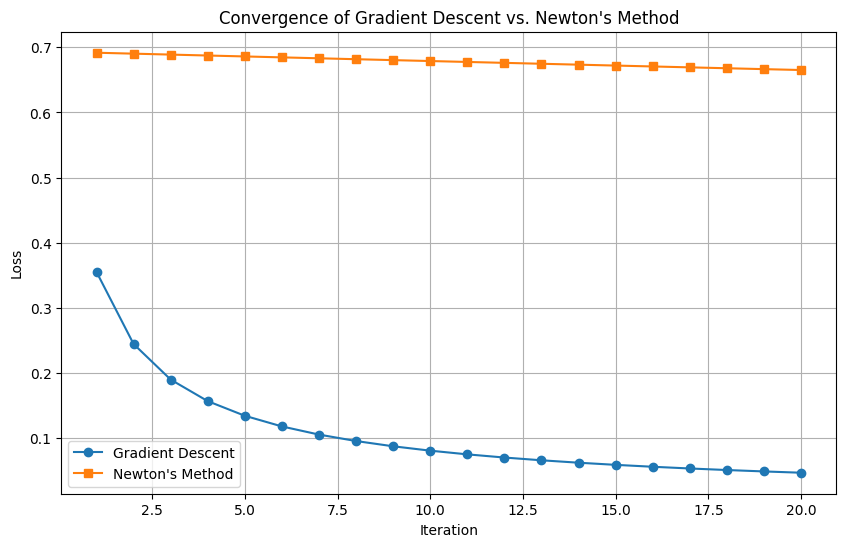

In [17]:
# CELL 4: Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), losses_gd,
         label='Gradient Descent', marker='o')
plt.plot(range(1, n_iterations + 1), losses_newton,
         label="Newton's Method", marker='s')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent vs. Newton\'s Method')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# CELL 5: Analyze convergence with new centers
np.random.seed(0)
new_centers = [[2, 2], [5, 1.5]]  # Updated centers
X_new, y_new = make_blobs(n_samples=2000, centers=new_centers, random_state=5)
X_new = np.dot(X_new, transformation)
X_new = np.hstack([np.ones((X_new.shape[0], 1)), X_new])
y_new = (y_new == 1).astype(int)

# Re-initialize weights
w_gd_new = np.zeros(X_new.shape[1])
losses_gd_new = []

# Run GD with same parameters
for i in range(n_iterations):
    grad = gradient(X_new, y_new, w_gd_new)
    w_gd_new = w_gd_new - learning_rate * grad
    current_loss = logistic_loss(X_new, y_new, w_gd_new)
    losses_gd_new.append(current_loss)

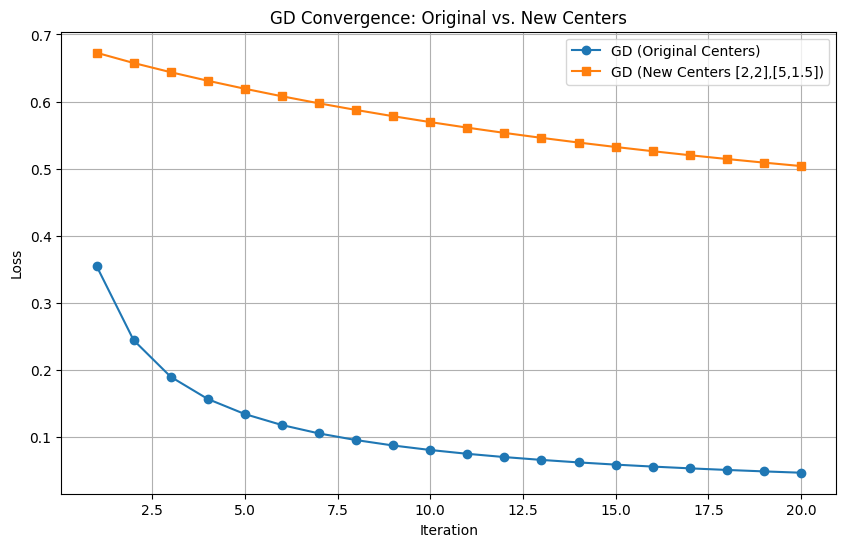

In [19]:
# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), losses_gd,
         label='GD (Original Centers)', marker='o')
plt.plot(range(1, n_iterations + 1), losses_gd_new,
         label='GD (New Centers [2,2],[5,1.5])', marker='s')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('GD Convergence: Original vs. New Centers')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
print("Final Loss (Original):", losses_gd[-1])
print("Final Loss (New):", losses_gd_new[-1])

Final Loss (Original): 0.04713105459261193
Final Loss (New): 0.5039763359946723
